In [1]:
# Exercise 2.4.8
# (a), (b) Load csv file and change index (integer to college names)
import pandas as pd

College = pd.read_csv("Analysis/Data/College.csv")
College = College.rename({"Unnamed: 0": "College"}, axis = 1)       # Column header: Unnamed: 0 -> College
College = College.set_index("College")                              # index: 0, 1, 2 ... -> College name
# College.loc["Abilene Christian University"]                       # For example: select one row of dataframe
                                                                    #     using string instead of int index

In [2]:
# (c) Numerical summary of "College" dataframe
College.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


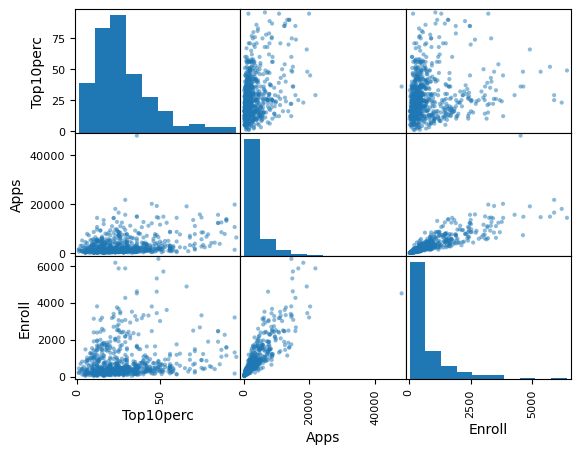

In [3]:
# (d) Scatterplot matrix
# Stack Overflow: Selecting multiple columns in a Pandas dataframe
pd.plotting.scatter_matrix(College[["Top10perc", "Apps", "Enroll"]]);

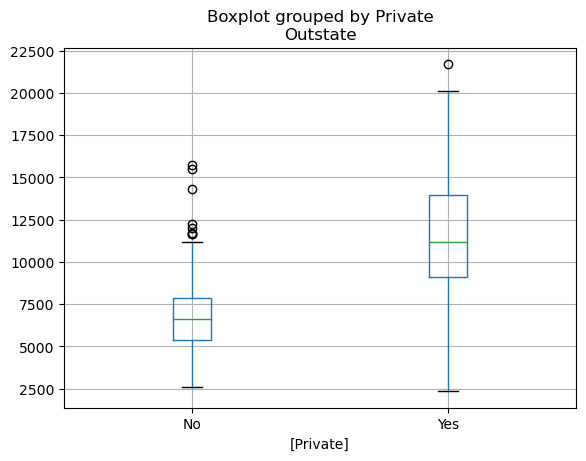

In [4]:
# (e) Side-by-side boxplot (並排)
GroupPrivate = College[["Outstate", "Private"]]
GroupPrivate.boxplot(by = ["Private"]);             # Grouped by "Private" (Yes or No)

Number of elite universities =  78


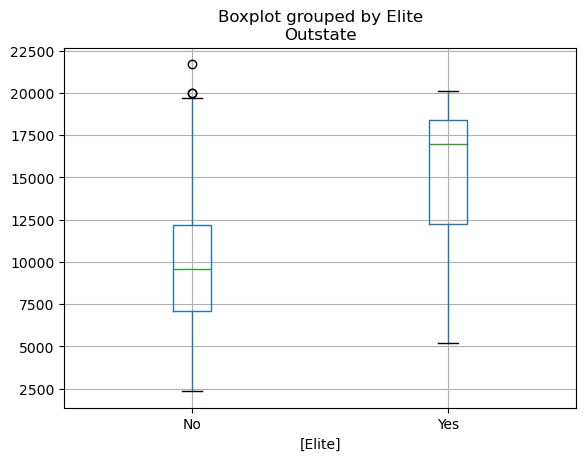

In [5]:
# (f)  Top10perc > 50% ? "Yes" : "No"
College["Elite"] = pd.cut(College["Top10perc"], [0, 50, 100], labels = ["No", "Yes"])
value = College["Elite"].value_counts()["Yes"]
print("Number of elite universities = ", value)

GroupElite = College[["Outstate", "Elite"]]
GroupElite.boxplot(by = ["Elite"]);             # Grouped by "Elite" (Yes or No)

Text(0.5, 1.0, 'Top10perc')

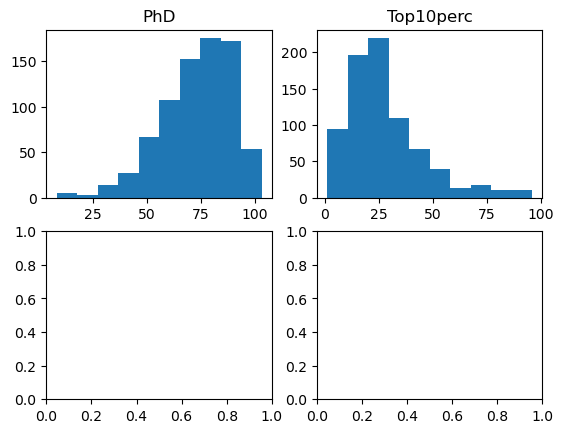

In [6]:
# (g) Histograms in subplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2)
ax[0][0].hist(College["PhD"])
ax[0][0].set_title("PhD")

ax[0][1].hist(College["Top10perc"])
ax[0][1].set_title("Top10perc")



Quantitative predictors:  mpg, displacement, horsepower, weight, acceleration, year.
Qualitative predictors:  cylinders, origin (There is a small number of possible values).


Text(0.5, 1.0, 'origin')

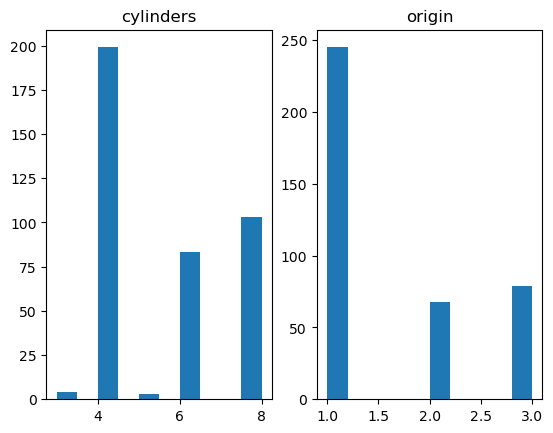

In [7]:
# Exercise 2.4.9
# (a) Quantitative or qualitative predictors
Auto = pd.read_csv("Analysis/Data/Auto.csv")

print("Quantitative predictors: ", "mpg, displacement, horsepower, weight, acceleration, year.")
print("Qualitative predictors: ", "cylinders, origin (There is a small number of possible values).")

fig, ax = plt.subplots(1,2)
ax[0].hist(Auto["cylinders"])
ax[0].set_title("cylinders")

ax[1].hist(Auto["origin"])
ax[1].set_title("origin")

In [8]:
# (b) Print range of each quantitative predictor
import numpy as np
stringArray = list(Auto)

qualitative = Auto[["cylinders", "origin", "name"]]
quantitative = Auto.drop(columns = ["cylinders", "origin", "name"])

for header in list(quantitative):
    print(np.min(Auto[header]), "<", header, "<", np.max(Auto[header]), "\n")


9.0 < mpg < 46.6 

68.0 < displacement < 455.0 

46 < horsepower < 230 

1613 < weight < 5140 

8.0 < acceleration < 24.8 

70 < year < 82 



In [9]:
# (c) Print mean and standard deviation
for header in list(quantitative):
    print(header + ": mean =", str( round( np.mean(Auto[header]), 3 ) )
         + ", standard deviation =", str( round( np.std(Auto[header]), 3 ) ) + "\n")


mpg: mean = 23.446, standard deviation = 7.795

displacement: mean = 194.412, standard deviation = 104.51

horsepower: mean = 104.469, standard deviation = 38.442

weight: mean = 2977.584, standard deviation = 848.318

acceleration: mean = 15.541, standard deviation = 2.755

year: mean = 75.98, standard deviation = 3.679



In [10]:
# (d) Remove 10th - 85th, print range, mean and std
AutoSubset = Auto.drop( Auto.index[9:84] )
print("Remove the 10th through 85th observations.")
for header in list(quantitative):
    min = str( np.min(AutoSubset[header]) )
    max = str( np.max(AutoSubset[header]) )
    mean = str( round( np.mean(AutoSubset[header]), 3 ) )
    std = str( round( np.std(AutoSubset[header]), 3 ) )
    
    print(min + " < " +  header + " < " + max
           + ", mean = " + mean + ", standard deviation = " + std + "\n")



Remove the 10th through 85th observations.
11.0 < mpg < 46.6, mean = 24.368, standard deviation = 7.868

68.0 < displacement < 455.0, mean = 187.754, standard deviation = 99.782

46 < horsepower < 230, mean = 100.956, standard deviation = 35.839

1649 < weight < 4997, mean = 2939.644, standard deviation = 811.367

8.5 < acceleration < 24.8, mean = 15.718, standard deviation = 2.69

70 < year < 82, mean = 77.132, standard deviation = 3.105



Text(0.5, 1.0, 'weight')

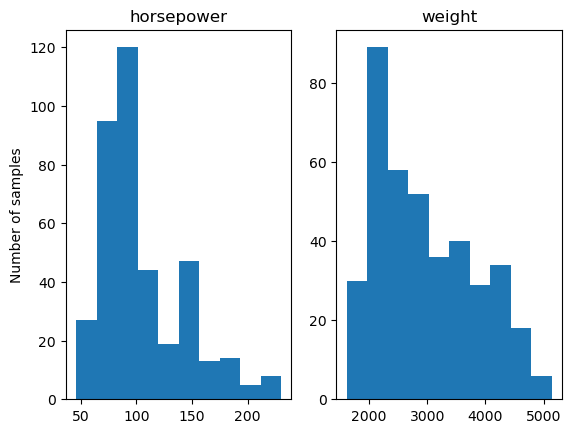

In [11]:
# (e) Find the relationships among the predictors
fig, ax = plt.subplots(1,2)
ax[0].hist(Auto["horsepower"])
ax[0].set_ylabel("Number of samples")
ax[0].set_title("horsepower")

ax[1].hist(Auto["weight"])
ax[1].set_title("weight")

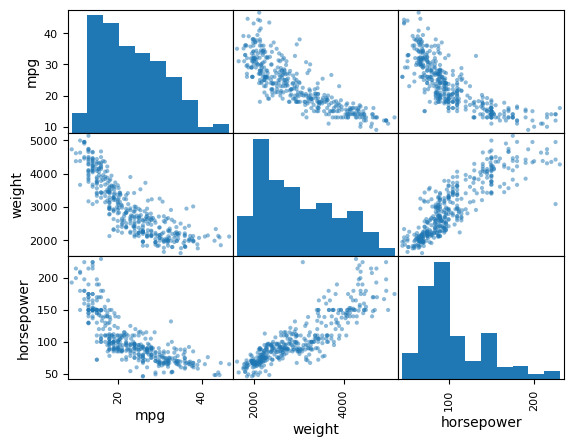

In [12]:
# (f) Pridict mpg
pd.plotting.scatter_matrix(Auto[["mpg", "weight", "horsepower"]]);

Text(0.5, 1.0, 'Imperfect attendance')

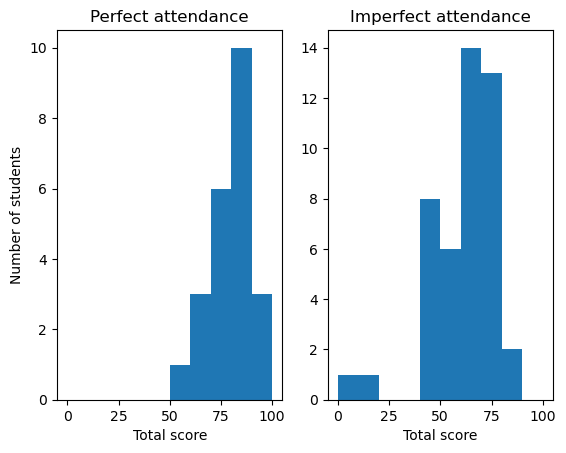

In [13]:
# 3. Calculate final score
# (1) Load data and fill all missing values (NaN)
# (2) HW scores: drop the lowest score
# (3) Weighted sum: HW*0.1 + sum(Exam)*0.25 + max(Exam)*0.1 + Participation*0.05
#            np.ceil(total score)
# (4) Adjust: 57 <= score < 60 to 60
# (5) subplots(1, 2): histogram of participation = 100 or not 

# (1)
grade = pd.read_csv("Analysis/Data/Grade.csv")
grade.fillna(0, inplace = True);

# (2) Stack Overflow: Find column whose name contains a specific string
hwScore = grade.filter(regex = "Homework")
hwTotal = np.sum(hwScore, axis = 1)
hwMin = np.min(hwScore, axis = 1)
meanHw = ( hwTotal - hwMin ) / (hwScore.shape[1] - 1)               # Drop the lowest score and calculate mean

# (3)
exam = grade.filter(regex = "Mid|Final")
weightList = np.array([0.1, 0.25, 0.1, 0.05])                       # Weights
scoreList = np.column_stack((meanHw, np.sum( exam, axis = 1 ), np.max(exam, axis = 1), grade["Participation"]))
totalScore = np.ceil( np.matmul(scoreList, weightList) )

# (4)
totalScore[(totalScore >= 57) & (totalScore < 60)] = 60
scoreList = np.column_stack((scoreList, totalScore))

# (5)
perfectAttendance = scoreList[scoreList[:,3] == 100]
imperfectAttendance = scoreList[scoreList[:,3] != 100]

edges = np.linspace(0, 100, 11)

fig, ax = plt.subplots(1,2)
ax[0].hist(perfectAttendance[:,-1], bins = edges)
ax[0].set_xlabel("Total score")
ax[0].set_ylabel("Number of students")
ax[0].set_title("Perfect attendance")

ax[1].hist(imperfectAttendance[:,-1], bins = edges)
ax[1].set_xlabel("Total score")
ax[1].set_title("Imperfect attendance")

In [14]:
# Analysis
meanPerfect = np.mean( perfectAttendance[:,-1] )
meanImperfect = np.mean( imperfectAttendance[:,-1] )
print("Average score of those with perfect attendance =", round(meanPerfect, 2))
print("Average score of those with imperfect attendance =", round(meanImperfect, 2))

correlation = np.corrcoef(scoreList[:,-1], scoreList[:,-2])
print("Correlation coefficient between the overall grade and participation: ")
print("correlation =", round(correlation[0,1], 2))

Average score of those with perfect attendance = 79.04
Average score of those with imperfect attendance = 61.4
Correlation coefficient between the overall grade and participation: 
correlation = 0.59
